## Importacion de Librerias y Carga de Datos

In [1]:
# importacion de librerias

import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("datasets/propiedades_scrapeadas_2025-09-08.csv")

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Dormitorios Servicio,Dormitorios Suite,Garage,Parrillero,Calefacción,Orientación,Plantas,Cocina,Año de Construcción,Jardín,Acepta Mascotas,Superficie Balcones,Propiedad Horizontal,Seguridad,Piscina,Gastos Comúnes,Altura,Aptos por piso,Disposición,Muebles,Patio,Pisos Edificio,Lavadero,Piso
0,https://www.casasymas.com.uy/propiedad/169046-...,U$S 248.000Venta,3,2.0,255 m²,90m²,255m²,Dormitorios de Servicio: 2,Dormitorios en Suite: 1,Cochera: 1,Parrillero,Hogar,Oeste,1.0,Cocina Definida,1923.0,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/183266-...,U$S 850.000Venta,4,3.0,429 m²,256m²,429m²,Dormitorios de Servicio: 1,Dormitorios en Suite: 1,Garaje: 4,NaN,NaN,NaN,NaN,Cocina Definida,2005.0,Jardín,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/190147-...,U$S 298.000Venta,3,3.0,230 m²,177m²,230m²,NaN,NaN,Garaje: 1,Parrillero,Hogar,NaN,2.0,Cocina Definida,1958.0,Jardín,NaN,40m²,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/940-cas...,U$S 380.000Venta,3,3.0,130 m²,130m²,150m²,NaN,Dormitorios en Suite: 1,Cochera: 1,Parrillero,losa radiante,Norte,2.0,Cocina Integrada,2024.0,Jardín,Acepta Mascotas,20m²,Propiedad Horizontal,virtual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.casasymas.com.uy/propiedad/165019-...,U$S 685.000Venta,4,5.0,289 m²,268m²,811m²,NaN,Dormitorios en Suite: 2,Cochera: 2,Parrillero,Radiadores,Este,2.0,Cocina Definida,1979.0,Jardín,NaN,NaN,NaN,NaN,Piscina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1934 non-null   object 
 1   precio                 1934 non-null   object 
 2   Dormitorios            1934 non-null   object 
 3   Baños                  1862 non-null   float64
 4   Superficie             1743 non-null   object 
 5   Superficie Construida  1785 non-null   object 
 6   Superficie Terreno     1559 non-null   object 
 7   Dormitorios Servicio   377 non-null    object 
 8   Dormitorios Suite      456 non-null    object 
 9   Garage                 1269 non-null   object 
 10  Parrillero             445 non-null    object 
 11  Calefacción            222 non-null    object 
 12  Orientación            876 non-null    object 
 13  Plantas                572 non-null    float64
 14  Cocina                 1411 non-null   object 
 15  Año 

# Limpieza de datos

## Eliminamos duplicados del dataset

In [5]:
# vemos los duplicados que hay en el dataset 

duplicados = df.duplicated()
print(f'Duplicados encontrados: {duplicados.sum()}')

Duplicados encontrados: 679


In [6]:
# dropeamos los duplicados del dataset por url 

df = df.drop_duplicates(subset='url')

## DROP DE COLUMNAS -- CRITERIO 

Vamos a dropear todas las columnas que tengan menos de 650 datos como criterio inicial. Luego podemos ver de cambiarlo, pero eso será el criterio inicial. 

In [7]:
# Calcular el número de valores no nulos por columna
non_null_counts = df.notnull().sum()

# Identificar las columnas a eliminar (non-null count < 650)
columns_to_drop = non_null_counts[non_null_counts < 650].index

# Eliminar las columnas identificadas
df = df.drop(columns=columns_to_drop)

# Mostrar las columnas restantes
print("Columnas restantes:", df.columns)

Columnas restantes: Index(['url', 'precio', 'Dormitorios', 'Baños', 'Superficie',
       'Superficie Construida', 'Superficie Terreno', 'Garage', 'Cocina',
       'Año de Construcción'],
      dtype='object')


In [9]:
print(columns_to_drop)

Index(['Dormitorios Servicio', 'Dormitorios Suite', 'Parrillero',
       'Calefacción', 'Orientación', 'Plantas', 'Jardín', 'Acepta Mascotas',
       'Superficie Balcones', 'Propiedad Horizontal', 'Seguridad', 'Piscina',
       'Gastos Comúnes', 'Altura', 'Aptos por piso', 'Disposición', 'Muebles',
       'Patio', 'Pisos Edificio', 'Lavadero', 'Piso'],
      dtype='object')


In [8]:
df.head()

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Cocina,Año de Construcción
0,https://www.casasymas.com.uy/propiedad/169046-...,U$S 248.000Venta,3,2.0,255 m²,90m²,255m²,Cochera: 1,Cocina Definida,1923.0
1,https://www.casasymas.com.uy/propiedad/183266-...,U$S 850.000Venta,4,3.0,429 m²,256m²,429m²,Garaje: 4,Cocina Definida,2005.0
2,https://www.casasymas.com.uy/propiedad/190147-...,U$S 298.000Venta,3,3.0,230 m²,177m²,230m²,Garaje: 1,Cocina Definida,1958.0
3,https://www.casasymas.com.uy/propiedad/940-cas...,U$S 380.000Venta,3,3.0,130 m²,130m²,150m²,Cochera: 1,Cocina Integrada,2024.0
4,https://www.casasymas.com.uy/propiedad/165019-...,U$S 685.000Venta,4,5.0,289 m²,268m²,811m²,Cochera: 2,Cocina Definida,1979.0


In [12]:
df = df.drop(columns=['Dormitorios Suite', 'Orientación', 'Cocina', 'Año de Construcción', 'Disposición'], errors='ignore')

In [13]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'superficie_construida' y 'superficie_terreno'

# Filtrar las filas que tienen NaN en 'superficie_construida' o 'superficie_terreno'
filas_con_nan = df[df[['Superficie Construida', 'Superficie Terreno', 'Superficie']].isnull().any(axis=1)]

# print(filas_con_nan.value_counts())

# Mostrar las filas con NaN
print(filas_con_nan)

                                                    url              precio  \
7     https://www.casasymas.com.uy/propiedad/117530-...  U$S 1.500.000Venta   
10    https://www.casasymas.com.uy/propiedad/186448-...    U$S 695.000Venta   
17    https://www.casasymas.com.uy/propiedad/169340-...    U$S 280.000Venta   
19    https://www.casasymas.com.uy/propiedad/90237-c...    U$S 203.400Venta   
20    https://www.casasymas.com.uy/propiedad/165774-...  U$S 2.900.000Venta   
...                                                 ...                 ...   
1879  https://www.casasymas.com.uy/propiedad/194975-...    U$S 205.000Venta   
1898  https://www.casasymas.com.uy/propiedad/181831-...    U$S 770.000Venta   
1903  https://www.casasymas.com.uy/propiedad/120273-...     U$S 55.000Venta   
1907  https://www.casasymas.com.uy/propiedad/151209-...     U$S 85.000Venta   
1917  https://www.casasymas.com.uy/propiedad/191947-...    U$S 770.000Venta   

     Dormitorios  Baños Superficie Superficie Const

## Registros fuera de criterios

Criterios: 

* Dormitorios: no mas de 10
* Baños: no mas de 5
* Garage: no mas de 5

In [ ]:
df.head()

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio,precio_por_m2_construido,precio_por_m2_terreno,precio_por_m2
0,https://www.casasymas.com.uy/propiedad/183266-casa-en-venta-de-4-dormitorios-en-carrasco-montevideo,850000,3,429,256,429,4,4,carrasco,E,3320,1981,1981
1,https://www.casasymas.com.uy/propiedad/940-casa-en-venta-de-3-dormitorios-con-garage-en-carrasco-montevideo,380000,3,130,130,150,1,3,carrasco,E,2923,2533,2923
2,https://www.casasymas.com.uy/propiedad/165019-casa-en-venta-4-dormitorios-piscina-en-punta-gorda-ref-1721,685000,5,289,268,811,2,4,punta-gorda,E,2556,845,2370
3,https://www.casasymas.com.uy/propiedad/159162-casa-en-venta-de-2-dormitorios-en-tres-cruces-montevideo,119000,1,380,62,380,0,2,tres-cruces,B,1919,313,313
4,https://www.casasymas.com.uy/propiedad/133140-casa-en-venta-en-barrio-san-nicolas-3-dormitorios-servicio-ref-1627,1780000,4,263,263,1316,3,3,san-nicolas,E,6768,1353,6768


In [ ]:
# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'dormitorios', 'baños' y 'garage'
# Filtramos el DataFrame según los criterios especificados
filtered_data = df[(df['Dormitorio'] > 10) | (df['Baños'] > 5) | (df['Garage'] > 5)]

print(f"Cantidad de filas a sacar: {len(filtered_data)}")

Cantidad de filas a sacar: 73


In [ ]:
# Filtramos el DataFrame para obtener las filas que NO cumplen con las condiciones
rows_to_keep = df[(df['Dormitorio'] < 10) & (df['Baños'] < 5) & (df['Garage'] < 5)]

# Asignamos el DataFrame filtrado de nuevo a df si deseas modificarlo en su lugar
df = rows_to_keep

# O, alternativamente, puedes usar el método drop si prefieres eliminar las filas directamente
# Esto requiere obtener los índices de las filas a eliminar
rows_to_drop = df[(df['Dormitorio'] > 10) | (df['Baños'] > 5) | (df['Garage'] > 5)].index
df.drop(rows_to_drop, inplace=True)

df.head(5)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio,precio_por_m2_construido,precio_por_m2_terreno,precio_por_m2
0,https://www.casasymas.com.uy/propiedad/183266-casa-en-venta-de-4-dormitorios-en-carrasco-montevideo,850000,3,429,256,429,4,4,carrasco,E,3320,1981,1981
1,https://www.casasymas.com.uy/propiedad/940-casa-en-venta-de-3-dormitorios-con-garage-en-carrasco-montevideo,380000,3,130,130,150,1,3,carrasco,E,2923,2533,2923
3,https://www.casasymas.com.uy/propiedad/159162-casa-en-venta-de-2-dormitorios-en-tres-cruces-montevideo,119000,1,380,62,380,0,2,tres-cruces,B,1919,313,313
4,https://www.casasymas.com.uy/propiedad/133140-casa-en-venta-en-barrio-san-nicolas-3-dormitorios-servicio-ref-1627,1780000,4,263,263,1316,3,3,san-nicolas,E,6768,1353,6768
6,https://www.casasymas.com.uy/propiedad/205399-venta-buceo-casa-3-dormitorios-gran-fondo-barbacoa-gge,370000,3,497,195,497,1,3,buceo,CH,1897,744,744


## Limpieza de campos 

Algunos campos tienen incoherencias entonces queremos dejarlos lo mas limpio posibles para nuestro analisis. 

In [14]:
# columna "precio" -> eliminamos el "U$S" y "Venta"

df['precio'] = df['precio'].str.replace("U\\$S", "", regex=True)
df['precio'] = df['precio'].str.replace("Venta", "", regex=True)
df['precio'] = df['precio'].str.replace(".", "", regex=False)
df['precio'] = df['precio'].str.strip()
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

print(df['precio'].head())

0    248000.0
1    850000.0
2    298000.0
3    380000.0
4    685000.0
Name: precio, dtype: float64


In [15]:
# columna "dormitorio" -> cambiamos "Monoambiente" por 0. 

df['Dormitorios'] = df['Dormitorios'].replace("Monoambiente", 0)
df['Dormitorio'] = pd.to_numeric(df['Dormitorios'], errors='coerce')

df = df.drop(columns=['Dormitorios'])

In [17]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Construida'] = df['Superficie Construida'].str.replace("mÂ²", "", regex=False)
df['Superficie Construida'] = df['Superficie Construida'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Construida'] = df["Superficie Construida"].str.strip()

# convertir a numero 

df['Superficie Construida'] = pd.to_numeric(df['Superficie Construida'], errors='coerce')

In [18]:
# columna "Superficie Terreno" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("mÂ²", "", regex=False)
df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Terreno'] = df["Superficie Terreno"].str.strip()

# convertir a numero 

df['Superficie Terreno'] = pd.to_numeric(df['Superficie Terreno'], errors='coerce')

In [19]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie'] = df['Superficie'].str.replace("mÂ²", "", regex=False)
df['Superficie'] = df['Superficie'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie'] = df["Superficie"].str.strip()

# convertir a numero 

df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')

In [20]:
# reemplazar en garage los NaN por 0

# Reemplazar vacíos o NaN por 0
df['Garage'] = df['Garage'].fillna(0)

# Extraer solo el número
df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')

# Reemplazar cualquier valor faltante con 0 y convertir a número
df['Garage'] = df['Garage'].fillna(0).astype(int)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Felipe\AppData\Local\Temp\ipykernel_6284\4221029522.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')


In [21]:
# drop de filas con NaN en precio

df = df[df['precio'].notna()]

In [22]:
# chequeamos que no quede nada con NaN en precio

df[df['precio'].isna()]

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio


In [24]:
# eliminar chacras del dataset 

rows_to_drop = df[df['Superficie Terreno'] > 20000].index

df = df.drop(rows_to_drop)

df.head(10)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/169046-...,248000.0,2.0,255.0,90.0,255.0,1,3
1,https://www.casasymas.com.uy/propiedad/183266-...,850000.0,3.0,429.0,256.0,429.0,4,4
2,https://www.casasymas.com.uy/propiedad/190147-...,298000.0,3.0,230.0,177.0,230.0,1,3
3,https://www.casasymas.com.uy/propiedad/940-cas...,380000.0,3.0,130.0,130.0,150.0,1,3
4,https://www.casasymas.com.uy/propiedad/165019-...,685000.0,5.0,289.0,268.0,811.0,2,4
5,https://www.casasymas.com.uy/propiedad/159162-...,119000.0,1.0,380.0,62.0,380.0,0,2
6,https://www.casasymas.com.uy/propiedad/133140-...,1780000.0,4.0,263.0,263.0,1316.0,3,3
7,https://www.casasymas.com.uy/propiedad/117530-...,1500000.0,5.0,NaN,444.0,666.0,2,8
8,https://www.casasymas.com.uy/propiedad/205399-...,370000.0,3.0,497.0,195.0,497.0,1,3
9,https://www.casasymas.com.uy/propiedad/204883-...,380000.0,2.0,250.0,180.0,250.0,1,4


## AGREGAR BARRIOS 

In [25]:
barrios = {
    "aguada": "B",
    "aires-puros": "C", 
    "atahualpa": "C", 
    "banados-de-carrasco": "F", 
    "barrio-sur": "B", 
    "belvedere": "A",
    "brazo-oriental": "C", 
    "buceo": "CH", 
    "bella-vista": "C", 
    "capurro": "C", 
    "carrasco": "E", 
    "carrasco-norte": "E", 
    "casabo": "A", 
    "pajas-blancas": "A", 
    "casavalle": "D", 
    "castro": "D", 
    "perez-castellanos": "D", 
    "centro": "B", 
    "cerrito": "D",
    "cerro": "A", 
    "ciudad-vieja": "B", 
    "colon": "G", 
    "conciliacion": "G", 
    "cordon": "B", 
    "abayuba": "G", 
    "flor-de-maronas": "F", 
    "ituzaingo": "F", 
    "jacinto-vera": "C", 
    "jardines-del-hipodromo": "F", 
    "la-paloma": "A", 
    "la-teja": "A", 
    "larranaga": "C", 
    "las-acacias": "D", 
    "las-canteras": "E", 
    "lezica": "G", 
    "melilla": "G", 
    "malvin": "E", 
    "malvin-norte": "E", 
    "paso-de-las-duranas": "G",
    "manga": "F", 
    "toledo-chico": "D", 
    "maronas": "F", 
    "parque-guarani": "F",
    "mercado-modelo": "C", 
    "bolivar": "C", 
    "nuevo-paris": "A", 
    "palermo": "B", 
    "parque-batlle": "CH", 
    "villa-dolores": "CH", 
    "parque-rodo": "B", 
    "paso-de-la-arena": "A", 
    "penarol": "G", 
    "lavalleja": "G", 
    "piedras-blancas": "D",
    "pocitos": "CH", 
    "prado": "A", 
    "nueva-savona": "A", 
    "punta-carretas": "CH", 
    "punta-gorda": "E", 
    "punta-rieles": "F", 
    "bella-italia": "F", 
    "reducto": "C", 
    "sayago": "G", 
    "tres-cruces": "B",  
    "tres-ombues": "A", 
    "victoria": "A",
    "union": "D", 
    "villa-espanola": "D", 
    "villa-garcia": "F", 
    "villa-munoz": "C", 
    "paso-molino": "A", 
    "la-comercial": "B",
    "san-nicolas": "E", 
    "goes": "C", 
    "parque-rivera": "E", 
    "la-blanqueada": "CH", 
    "la-figurita": "C"
}

barrios_sorted = sorted(barrios, key=len, reverse = True)

def extraer_barrios_de_url(url: str) -> str | None:
    for barrio in barrios_sorted:
        if barrio in url: 
            return barrio
    return None

df["barrio"] = df["url"].apply(extraer_barrios_de_url)
df["municipio"] = df["barrio"].map(barrios)


In [27]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 117


In [28]:
df = df.dropna(subset=["barrio"]).reset_index(drop=True)

In [29]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 0


## AGREGAR COLUMNA BARRIO 

In [32]:
barrios = df['url']

print(barrios)

0       https://www.casasymas.com.uy/propiedad/183266-...
1       https://www.casasymas.com.uy/propiedad/940-cas...
2       https://www.casasymas.com.uy/propiedad/165019-...
3       https://www.casasymas.com.uy/propiedad/159162-...
4       https://www.casasymas.com.uy/propiedad/133140-...
                              ...                        
1123    https://www.casasymas.com.uy/propiedad/170075-...
1124    https://www.casasymas.com.uy/propiedad/191947-...
1125    https://www.casasymas.com.uy/propiedad/103224-...
1126    https://www.casasymas.com.uy/propiedad/202384-...
1127    https://www.casasymas.com.uy/propiedad/190421-...
Name: url, Length: 1128, dtype: object


## Export dataset

In [33]:
df.head(5)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/183266-...,850000.0,3.0,429.0,256.0,429.0,4,4,carrasco,E
1,https://www.casasymas.com.uy/propiedad/940-cas...,380000.0,3.0,130.0,130.0,150.0,1,3,carrasco,E
2,https://www.casasymas.com.uy/propiedad/165019-...,685000.0,5.0,289.0,268.0,811.0,2,4,punta-gorda,E
3,https://www.casasymas.com.uy/propiedad/159162-...,119000.0,1.0,380.0,62.0,380.0,0,2,tres-cruces,B
4,https://www.casasymas.com.uy/propiedad/133140-...,1780000.0,4.0,263.0,263.0,1316.0,3,3,san-nicolas,E


# COMIENZA EDA

In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [37]:
df.describe()

,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio
count,1.128000e+03,1093.000000,1015.000000,1042.000000,910.000000,1128.00000,1128.000000
mean,4.696420e+05,2.696249,362.684926,213.509597,485.963736,1.18617,3.668440
std,4.533664e+05,1.775173,516.165456,202.341359,944.250616,1.52090,3.022835
min,3.350000e+02,1.000000,10.000000,16.000000,6.000000,0.00000,0.000000
25%,1.800000e+05,2.000000,132.000000,105.000000,135.000000,0.00000,3.000000
50%,3.300000e+05,2.000000,235.000000,160.000000,284.500000,1.00000,3.000000
75%,5.912500e+05,3.000000,422.500000,269.750000,531.500000,2.00000,4.000000
max,5.000000e+06,27.000000,10143.000000,4376.000000,12907.000000,18.00000,81.000000


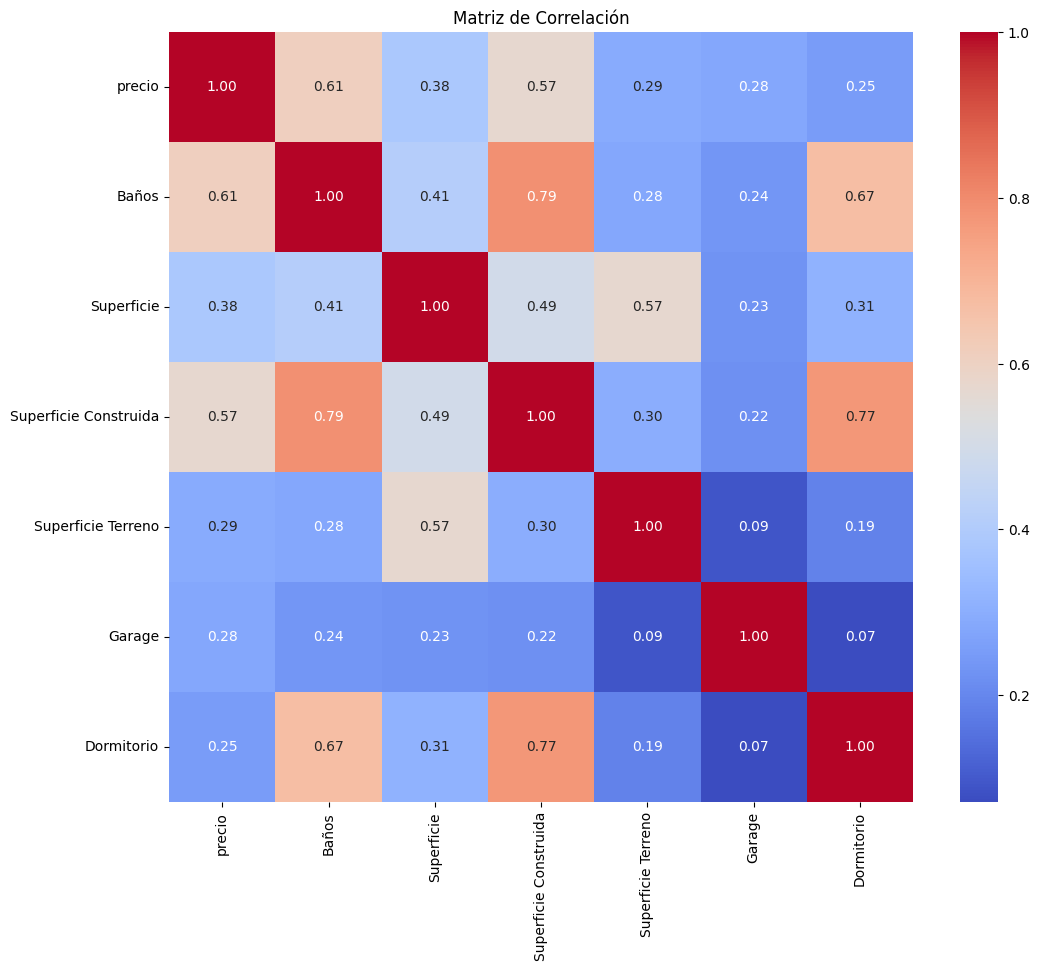

In [38]:
numeric_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando solo las columnas numéricas
correlation_matrix = numeric_df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Muestra el gráfico
plt.title('Matriz de Correlación')
plt.show()

## Boxplots

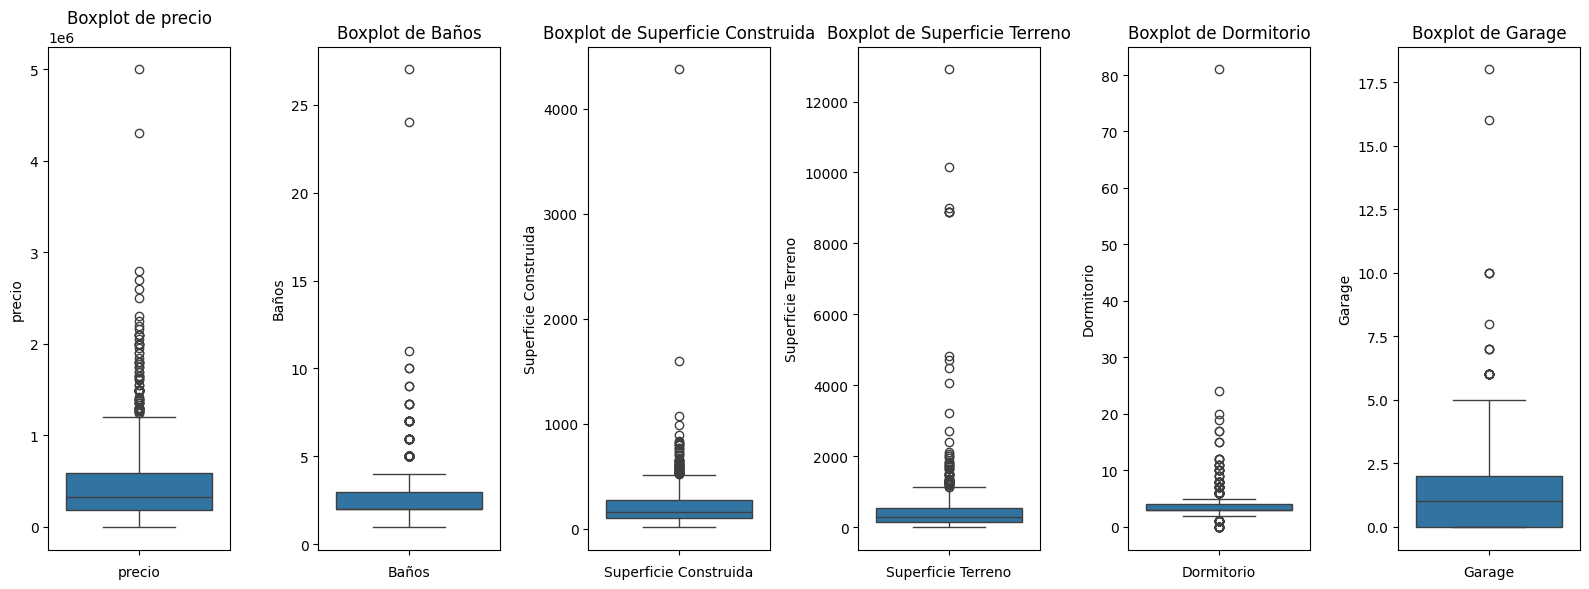

In [39]:
# Lista de las columnas que quieres graficar
columnas_interes = ['precio', 'Baños', 'Superficie Construida', 'Superficie Terreno', 'Dormitorio', 'Garage']

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, len(columnas_interes), figsize=(16, 6))

# Iterar sobre las columnas y los ejes para crear un boxplot para cada columna
for ax, col in zip(axes, columnas_interes):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

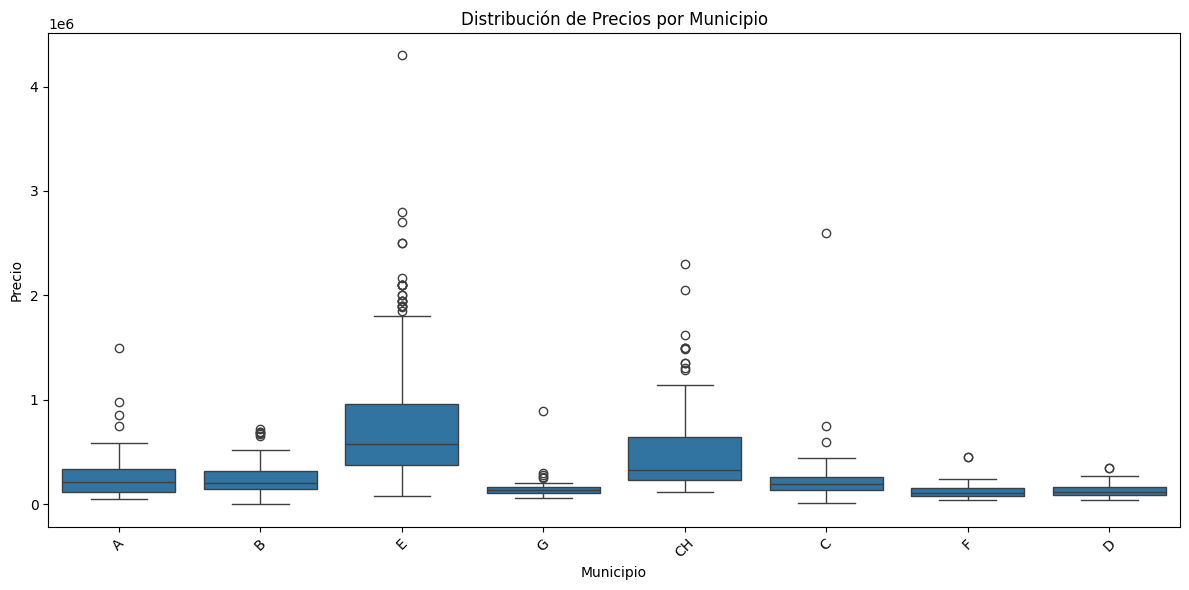

In [99]:
# Asegúrate de que 'df' tiene las columnas 'municipio' y 'precio'
# Aquí 'precio' es la columna que contiene los precios que quieres graficar

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='municipio', y='precio', data=df)

# Añadir título y etiquetas
plt.title('Distribución de Precios por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son largas
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

## Cantidad de datos por municipio

In [40]:
# Asegúrate de que 'df' es tu DataFrame y 'municipio' es la columna que contiene los municipios
cantidad_por_municipio = df['municipio'].value_counts()

# Mostrar la cantidad de datos por municipio
print(cantidad_por_municipio)

municipio
E     439
CH    225
B     144
A     107
C      97
G      54
D      37
F      25
Name: count, dtype: int64


## Precio m2

basado en superficie contruida y en superficie terreno.

In [41]:
df.head(5)

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/183266-...,850000.0,3.0,429.0,256.0,429.0,4,4,carrasco,E
1,https://www.casasymas.com.uy/propiedad/940-cas...,380000.0,3.0,130.0,130.0,150.0,1,3,carrasco,E
2,https://www.casasymas.com.uy/propiedad/165019-...,685000.0,5.0,289.0,268.0,811.0,2,4,punta-gorda,E
3,https://www.casasymas.com.uy/propiedad/159162-...,119000.0,1.0,380.0,62.0,380.0,0,2,tres-cruces,B
4,https://www.casasymas.com.uy/propiedad/133140-...,1780000.0,4.0,263.0,263.0,1316.0,3,3,san-nicolas,E


In [42]:
# Asegúrate de que 'df' tiene las columnas 'precio', 'superficie_construida' y 'superficie_terreno'

# Calcular el precio por metro cuadrado basado en la superficie construida
df['precio_por_m2_construido'] = df['precio'] / df['Superficie Construida']

# Calcular el precio por metro cuadrado basado en la superficie del terreno
df['precio_por_m2_terreno'] = df['precio'] / df['Superficie Terreno']

df['precio_por_m2'] = df['precio'] / df['Superficie']

# Mostrar las nuevas columnas
print(df[['precio', 'Superficie Construida', 'precio_por_m2_construido', 'Superficie Terreno', 'precio_por_m2_terreno']])

         precio  Superficie Construida  precio_por_m2_construido  \
0      850000.0                  256.0               3320.312500   
1      380000.0                  130.0               2923.076923   
2      685000.0                  268.0               2555.970149   
3      119000.0                   62.0               1919.354839   
4     1780000.0                  263.0               6768.060837   
...         ...                    ...                       ...   
1123   320000.0                  100.0               3200.000000   
1124   770000.0                  300.0               2566.666667   
1125    95000.0                   70.0               1357.142857   
1126   259000.0                   76.0               3407.894737   
1127   160000.0                  146.0               1095.890411   

      Superficie Terreno  precio_por_m2_terreno  
0                  429.0            1981.351981  
1                  150.0            2533.333333  
2                  811.0         

In [44]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'superficie_construida' y 'superficie_terreno'

# Filtrar las filas que tienen NaN en 'superficie_construida' o 'superficie_terreno'
filas_con_nan = df[df[['Superficie Construida', 'Superficie Terreno']].isnull().any(axis=1)]

# Mostrar las filas con NaN
print(filas_con_nan)

                                                    url     precio  Baños  \
14    https://www.casasymas.com.uy/propiedad/169340-...   280000.0    2.0   
16    https://www.casasymas.com.uy/propiedad/90237-c...   203400.0    2.0   
28    https://www.casasymas.com.uy/propiedad/173084-...  1650000.0   10.0   
35    https://www.casasymas.com.uy/propiedad/200968-...   695000.0    3.0   
37    https://www.casasymas.com.uy/propiedad/194470-...   267000.0    3.0   
...                                                 ...        ...    ...   
1107  https://www.casasymas.com.uy/propiedad/34846-c...   780000.0    3.0   
1108  https://www.casasymas.com.uy/propiedad/194975-...   205000.0    1.0   
1116  https://www.casasymas.com.uy/propiedad/181831-...   770000.0    5.0   
1118  https://www.casasymas.com.uy/propiedad/120273-...    55000.0    1.0   
1121  https://www.casasymas.com.uy/propiedad/151209-...    85000.0    1.0   

      Superficie  Superficie Construida  Superficie Terreno  Garage  \
14  

## Precio promedio por municipio

In [45]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio'

# Calcular el precio promedio por municipio
precio_promedio_por_municipio = df.groupby('municipio')['precio'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_municipio = pd.DataFrame({
    'precio_promedio': precio_promedio_por_municipio,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio
resultado_municipio = resultado_municipio.sort_values(by='precio_promedio', ascending=False)

# Mostrar el resultado
print(resultado_municipio)

           precio_promedio  cantidad_propiedades
municipio                                       
E            730475.496583                   439
CH           450662.222222                   225
B            267582.534722                   144
A            248004.663551                   107
C            246041.237113                    97
F            173036.200000                    25
G            167611.111111                    54
D            145056.756757                    37


In [46]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_construido'

# Calcular el precio promedio por m2 construido por municipio
precio_promedio_por_m2_construido = df.groupby('municipio')['precio_por_m2_construido'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_m2_municipio = pd.DataFrame({
    'precio_promedio_por_m2': precio_promedio_por_m2_construido,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio por m2
resultado_m2_municipio = resultado_m2_municipio.sort_values(by='precio_promedio_por_m2', ascending=False)

# Mostrar el resultado
print(resultado_m2_municipio)

           precio_promedio_por_m2  cantidad_propiedades
municipio                                              
E                     3134.195365                   439
A                     2775.187732                   107
CH                    2418.520302                   225
C                     1569.724055                    97
B                     1378.081155                   144
D                     1344.464342                    37
F                     1273.053340                    25
G                     1184.423260                    54


In [47]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_terreno'

# Calcular el precio promedio por m2 terreno por municipio
precio_promedio_por_m2_terreno = df.groupby('municipio')['precio_por_m2_terreno'].mean()

# Calcular la cantidad de propiedades por municipio
cantidad_propiedades_por_municipio = df.groupby('municipio').size()

# Combinar ambos resultados en un DataFrame
resultado_m2_terreno_municipio = pd.DataFrame({
    'precio_promedio_por_m2_terreno': precio_promedio_por_m2_terreno,
    'cantidad_propiedades': cantidad_propiedades_por_municipio
})

# Ordenar de mayor a menor por precio promedio por m2 terreno
resultado_m2_terreno_municipio = resultado_m2_terreno_municipio.sort_values(by='precio_promedio_por_m2_terreno', ascending=False)

# Mostrar el resultado
print(resultado_m2_terreno_municipio)

           precio_promedio_por_m2_terreno  cantidad_propiedades
municipio                                                      
CH                            4273.101870                   225
C                             2502.275859                    97
E                             2241.409951                   439
B                             2200.577022                   144
A                             1656.087799                   107
D                              723.975745                    37
G                              445.537350                    54
F                              290.209012                    25


## Lo mismo por barrios

In [48]:
# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'barrio' y 'precio'

# Calcular el precio promedio por barrio
precio_promedio_por_barrios = df.groupby('barrio')['precio'].mean()

# Calcular la cantidad de propiedades por barrio
cantidad_propiedades_por_barrio = df.groupby('barrio').size()

# Combinar ambos resultados en un DataFrame
resultado = pd.DataFrame({
    'precio_promedio': precio_promedio_por_barrios,
    'cantidad_propiedades': cantidad_propiedades_por_barrio
})

# Ordenar de mayor a menor por precio promedio
resultado = resultado.sort_values(by='precio_promedio', ascending=False)

# Mostrar el resultado sin decimales
print(resultado.round(0).astype(int))

                 precio_promedio  cantidad_propiedades
barrio                                                
san-nicolas              1237478                    23
carrasco                  906187                   208
punta-carretas            764871                    31
punta-gorda               693030                    67
pocitos                   502868                    76
...                          ...                   ...
conciliacion               84917                     6
flor-de-maronas            78781                     5
las-acacias                73000                     1
nuevo-paris                69333                     3
tres-ombues                49000                     1

[63 rows x 2 columns]


In [49]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'barrio' y 'precio_por_m2_construido'

# Calcular el precio promedio por m2 construido por barrio
precio_promedio_por_m2_construido_barrios = df.groupby('barrio')['precio_por_m2_construido'].mean()

precio_promedio_por_m2_construido_barrios = precio_promedio_por_m2_construido_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por barrio
print(precio_promedio_por_m2_construido_barrios)

barrio
san-nicolas      5150
prado            4173
carrasco         3391
carrasco-norte   3078
villa-dolores    2951
                 ... 
ituzaingo         757
ciudad-vieja      693
nuevo-paris       646
villa-garcia      410
tres-ombues       NaN
Name: precio_por_m2_construido, Length: 63, dtype: float64


In [50]:
# Configurar pandas para mostrar números sin decimales
pd.set_option('display.float_format', '{:.0f}'.format)

# Calcular el precio promedio por metro cuadrado de terreno por barrio
precio_promedio_por_m2_terreno_barrios = df.groupby('barrio')['precio_por_m2_terreno'].mean()

# Ordenar de mayor a menor
precio_promedio_por_m2_terreno_barrios = precio_promedio_por_m2_terreno_barrios.sort_values(ascending=False)

# Mostrar el precio promedio por metro cuadrado de terreno por barrio
print(precio_promedio_por_m2_terreno_barrios)

barrio
parque-batlle            8851
brazo-oriental           5470
tres-ombues              4900
pocitos                  4608
punta-carretas           4501
                         ... 
pajas-blancas             205
manga                     181
jardines-del-hipodromo    157
punta-rieles              124
las-acacias               NaN
Name: precio_por_m2_terreno, Length: 63, dtype: float64


## Precio promedio por m2 construido, m2 terreno

In [51]:
df.head()

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio,precio_por_m2_construido,precio_por_m2_terreno,precio_por_m2
0,https://www.casasymas.com.uy/propiedad/183266-...,850000,3,429,256,429,4,4,carrasco,E,3320,1981,1981
1,https://www.casasymas.com.uy/propiedad/940-cas...,380000,3,130,130,150,1,3,carrasco,E,2923,2533,2923
2,https://www.casasymas.com.uy/propiedad/165019-...,685000,5,289,268,811,2,4,punta-gorda,E,2556,845,2370
3,https://www.casasymas.com.uy/propiedad/159162-...,119000,1,380,62,380,0,2,tres-cruces,B,1919,313,313
4,https://www.casasymas.com.uy/propiedad/133140-...,1780000,4,263,263,1316,3,3,san-nicolas,E,6768,1353,6768


In [52]:
# Configurar pandas para mostrar todos los datos sin cortar
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.0f}'.format)

# Crear la tabla directamente con groupby y agg
tabla_completa = df.groupby('barrio').agg({
    'precio_por_m2': 'mean',
    'precio_por_m2_construido': 'mean',
    'precio_por_m2_terreno': 'mean',
    'url': 'count' 
}).rename(columns={'url': 'cantidad_propiedades'})

# Ordenar de mayor a menor por precio promedio
tabla_completa = tabla_completa.sort_values(by='precio_por_m2_construido', ascending=False)

# También puedes guardar en una variable para manipular después
df_tabla_barrios = tabla_completa.copy()

df_tabla_barrios.head(20)

,precio_por_m2,precio_por_m2_construido,precio_por_m2_terreno,cantidad_propiedades
barrio,,,,
san-nicolas,2604,5150,1949,23
prado,1614,4173,2443,55
carrasco,2456,3391,2052,208
carrasco-norte,2317,3078,2566,79
villa-dolores,2222,2951,1181,2
punta-carretas,2628,2868,4501,31
punta-gorda,2893,2568,2663,67
parque-batlle,1929,2505,8851,30
pocitos,2086,2455,4608,76


## Boxplots

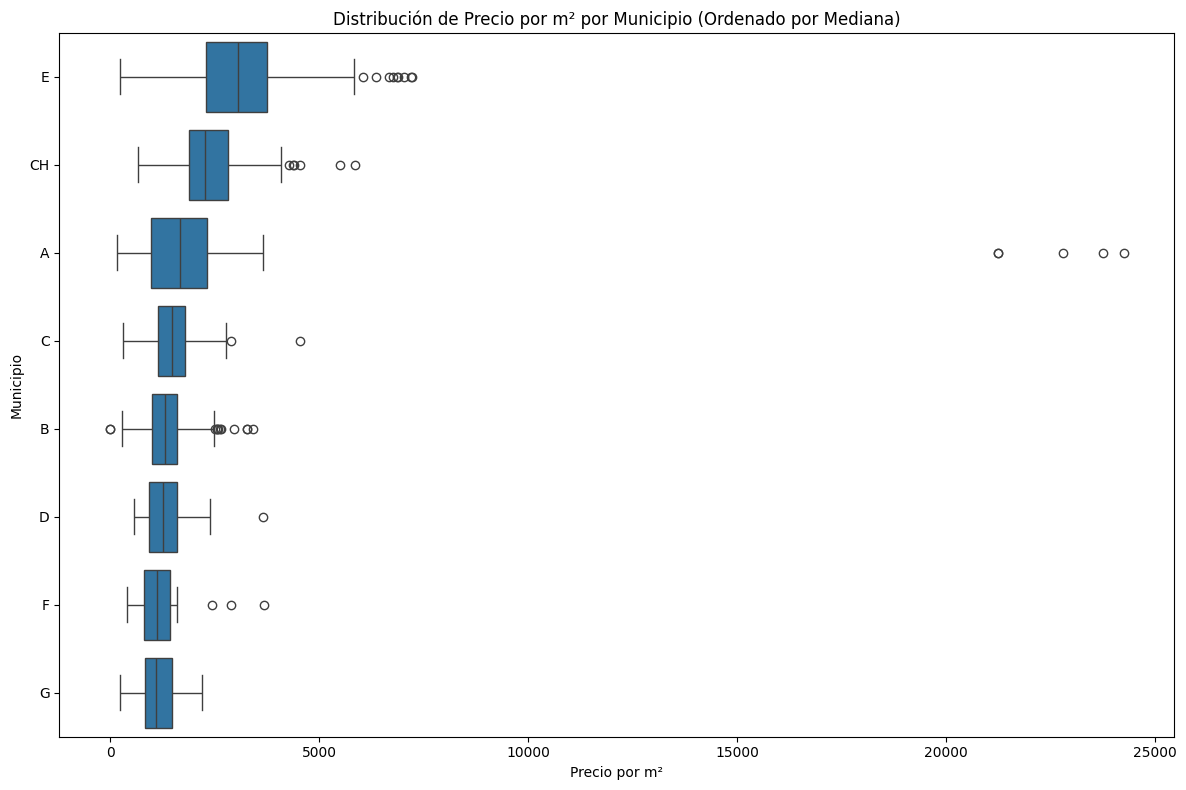

Medianas por municipio (ordenadas de mayor a menor):
municipio
E    3073
CH   2261
A    1667
C    1484
B    1319
D    1272
F    1125
G    1107
Name: precio_por_m2_construido, dtype: float64


In [54]:
# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.0f}'.format)

# Asegúrate de que 'df' es tu DataFrame y tiene las columnas 'municipio' y 'precio_por_m2_construido'

# Calcular la mediana por municipio para ordenar
mediana_por_municipio = df.groupby('municipio')['precio_por_m2_construido'].median().sort_values(ascending=False)

# Obtener el orden de los municipios (de mayor a menor mediana)
orden_municipios = mediana_por_municipio.index.tolist()

# Crear el boxplot con municipios ordenados en el eje Y por mediana
plt.figure(figsize=(12, 8))
sns.boxplot(y='municipio', x='precio_por_m2_construido', data=df, order=orden_municipios)

# Añadir título y etiquetas
plt.title('Distribución de Precio por m² por Municipio (Ordenado por Mediana)')
plt.xlabel('Precio por m²')
plt.ylabel('Municipio')

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Mostrar las medianas para verificar el orden
print("Medianas por municipio (ordenadas de mayor a menor):")
print(mediana_por_municipio)

## Export dataset

In [74]:
df.to_excel('datasets/final_dataset_2025-09-08.xlsx', index=False)

# Modelo Machine Learning

## Preprocesamiento de datos

In [77]:
df.head()

,url,precio,Baños,Superficie,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio,precio_por_m2_construido,precio_por_m2_terreno,precio_por_m2
0,https://www.casasymas.com.uy/propiedad/183266-casa-en-venta-de-4-dormitorios-en-carrasco-montevideo,850000,3,429,256,429,4,4,carrasco,E,3320,1981,1981
1,https://www.casasymas.com.uy/propiedad/940-casa-en-venta-de-3-dormitorios-con-garage-en-carrasco-montevideo,380000,3,130,130,150,1,3,carrasco,E,2923,2533,2923
3,https://www.casasymas.com.uy/propiedad/159162-casa-en-venta-de-2-dormitorios-en-tres-cruces-montevideo,119000,1,380,62,380,0,2,tres-cruces,B,1919,313,313
4,https://www.casasymas.com.uy/propiedad/133140-casa-en-venta-en-barrio-san-nicolas-3-dormitorios-servicio-ref-1627,1780000,4,263,263,1316,3,3,san-nicolas,E,6768,1353,6768
6,https://www.casasymas.com.uy/propiedad/205399-venta-buceo-casa-3-dormitorios-gran-fondo-barbacoa-gge,370000,3,497,195,497,1,3,buceo,CH,1897,744,744


In [51]:
# imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np


In [52]:
file_path = 'datasets/final_dataset_2025-09-08.xlsx'

data = pd.read_excel(file_path, sheet_name='Sheet1')

In [53]:
X = data[["Baños", "Dormitorio", "Superficie", "Superficie Construida", 
          "Superficie Terreno", "Garage", "barrio", "municipio"]]
y = np.log(data["precio"])

In [54]:
# nulos: reemplazo por 0 

X = X.fillna(0)

In [55]:
variables_categoricas = ['barrio', 'municipio']
variables_numericas = ['Baños', 'Dormitorio', 'Superficie', 'Superficie Construida', 'Superficie Terreno', 'Garage']

In [56]:
# aplicamos one hot encoding a variables categoricas (barrio, municipio)

encoder = OneHotEncoder(sparse_output=False, drop="first")

encoded = encoder.fit_transform(X[variables_categoricas])

In [57]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(variables_categoricas))

In [58]:
encoded_df.head()

,barrio_aires-puros,barrio_atahualpa,barrio_barrio-sur,barrio_bella-vista,barrio_belvedere,barrio_bolivar,barrio_brazo-oriental,barrio_buceo,barrio_capurro,barrio_carrasco,...,barrio_villa-espanola,barrio_villa-garcia,barrio_villa-munoz,municipio_B,municipio_C,municipio_CH,municipio_D,municipio_E,municipio_F,municipio_G
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [59]:
X_encoded = pd.concat([X.drop(columns=variables_categoricas), encoded_df], axis=1)

In [60]:
X_encoded.head()

,Baños,Dormitorio,Superficie,Superficie Construida,Superficie Terreno,Garage,barrio_aires-puros,barrio_atahualpa,barrio_barrio-sur,barrio_bella-vista,...,barrio_villa-espanola,barrio_villa-garcia,barrio_villa-munoz,municipio_B,municipio_C,municipio_CH,municipio_D,municipio_E,municipio_F,municipio_G
0,3,4,429.0,256.0,429.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,3,130.0,130.0,150.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,2,380.0,62.0,380.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3,263.0,263.0,1316.0,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,3,497.0,195.0,497.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Regresión Lineal

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
y_test_pred_log = model.predict(X_test)

In [65]:
y_test_pred_real = np.exp(y_test_pred_log)
y_test_real = np.exp(y_test)

In [66]:
mse_real = mean_squared_error(y_test_real, y_test_pred_real)
r2_real = r2_score(y_test_real, y_test_pred_real)

print(f"Mean Squared Error: {mse_real}")
print(f"R^2 Score: {r2_real}")

Mean Squared Error: 36088369900.04222
R^2 Score: 0.7058368163580556


In [67]:
rmse_real = np.sqrt(mse_real)
print(f"Root Mean Squared Error (RMSE): {rmse_real}")

Root Mean Squared Error (RMSE): 189969.39200840282


In [68]:
from sklearn.metrics import mean_absolute_error

mae_real = mean_absolute_error(y_test_real, y_test_pred_real)
print(f"Mean Absolute Error (MAE): {mae_real}")


Mean Absolute Error (MAE): 104814.4836338487


## ARBOL DE DECISION

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


In [70]:
tree_model = DecisionTreeRegressor(random_state=42)

In [71]:
tree_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [72]:
y_test_pred_log_tree = tree_model.predict(X_test)

In [73]:
y_test_pred_real_tree = np.exp(y_test_pred_log_tree)
y_test_real_tree = np.exp(y_test)

In [74]:
mse_real_tree = mean_squared_error(y_test_real_tree, y_test_pred_real_tree)
r2_real_tree = r2_score(y_test_real_tree, y_test_pred_real_tree)

print(f"Mean Squared Error (Real): {mse_real_tree}")
print(f"R^2 Score (Real): {r2_real_tree}")

Mean Squared Error (Real): 46626399553.65288
R^2 Score (Real): 0.6199393274771379


In [75]:
rmse_real_tree = np.sqrt(mse_real_tree)
print(f"Root Mean Squared Error (RMSE): {rmse_real_tree}")

Root Mean Squared Error (RMSE): 215931.46957693054


In [76]:
mae_real_tree = mean_absolute_error(y_test_real_tree, y_test_pred_real_tree)
print(f"Mean Absolute Error (MAE): {mae_real_tree}")

Mean Absolute Error (MAE): 122121.92749916052


## XGBoost

In [77]:
!pip install xgboost

In [78]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [79]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [80]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [81]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1)

In [82]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_test_pred_log_xgboost = best_model.predict(X_test)


In [ ]:
y_test_pred_real_xgboost = np.exp(y_test_pred_log_xgboost)
y_test_real_xgboost = np.exp(y_test)

In [ ]:
mse_real = mean_squared_error(y_test_real_xgboost, y_test_pred_real_xgboost)
r2_real = r2_score(y_test_real_xgboost, y_test_pred_real_xgboost)
mae_real = mean_absolute_error(y_test_real_xgboost, y_test_pred_real_xgboost)

In [ ]:
print(f"Mean Squared Error (Real): {mse_real}")
print(f"R^2 Score (Real): {r2_real}")
print(f"Mean Absolute Error (Real): {mae_real}")

Mean Squared Error (Real): 38286211323.807076
R^2 Score (Real): 0.6879217918738365
Mean Absolute Error (Real): 100284.03747881531
